In [1]:
import time
import cv2
import os
import pytesseract
from pytesseract import Output
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
#from deslant_img import deslant_img
import imutils


pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'

# Hyperparameters
confidence_threshold = 60
width_tolerance = 0.3
min_entry_width = 10
max_entry_width = 250

# Parameters
input_dir = "Dataset/Ownership/jpg"
output_dir = "Dataset/Ownership/ocr/"
cropped_dir = "Dataset/Ownership/cropped"
log_dir = "Dataset/Ownership/"

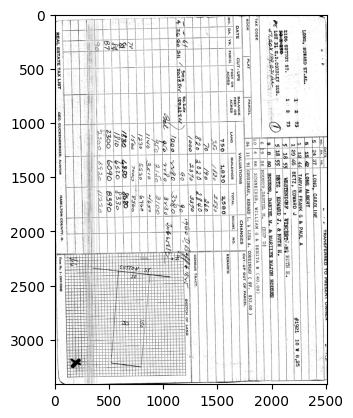

In [2]:
img = cv2.imread(f'{cropped_dir}/0010002007300.jpg')
plt.imshow(img)


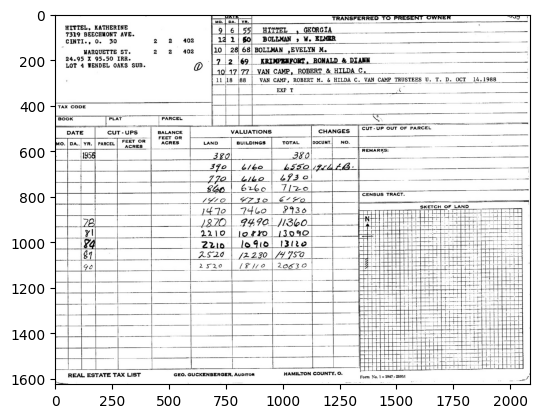

In [3]:
img = cv2.imread(f'{cropped_dir}/0020002040200.jpg')

plt.imshow(img)

In [3]:
results = pytesseract.image_to_osd(img, output_type=Output.DICT)

print("[INFO] detected orientation: {}".format(
	results["orientation"]))
print("[INFO] rotate by {} degrees to correct".format(
	results["rotate"]))
print("[INFO] detected script: {}".format(results["script"]))

#rotated = imutils.rotate_bound(img, angle=results["rotate"])

#plt.imshow(rotated)


[INFO] detected orientation: 0
[INFO] rotate by 0 degrees to correct
[INFO] detected script: Cyrillic


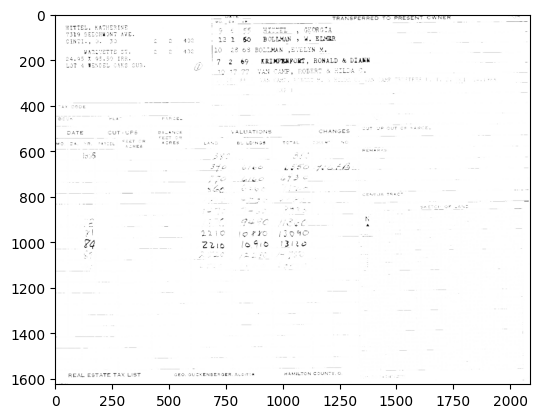

In [9]:
# Removing gridlines

plt.imshow(img)

kernel = np.ones((3,4), np.uint8)

dilation = cv2.dilate(img, kernel, iterations = 1)

plt.imshow(dilation)

# ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
# k2 = np.ones((5, 5), np.uint8)


# opening = cv2.morphologyEx(thresh2, cv2.MORPH_OPEN, k2)

# #opening = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# plt.imshow(opening)

True

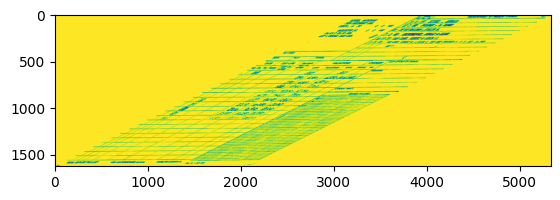

In [71]:
img = cv2.imread(f'{input_dir}/0020002040200.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = 255*(gray < 128).astype(np.uint8) # To invert the text to white
coords = cv2.findNonZero(gray) # Find all non-zero points (text)
x, y, w, h = cv2.boundingRect(coords) # Find minimum spanning bounding box
img = img[y:y+h, x:x+w] # Crop the image - note we do this on the original image

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

res = deslant_img(img)

plt.imshow(res.img)

cv2.imwrite('original.jpg', img)
cv2.imwrite('deslanted.jpg', res.img)


In [72]:
d = pytesseract.image_to_data(img, output_type=Output.DICT)

buildings_indicies = []
total_indicies = []

for index, text in enumerate(d['text']):
    if text.lower() == "buildings":
        buildings_indicies.append(index)
    if text.lower() == "total":
        total_indicies.append(index)

# img = mark_indicies_list(range(len(d['text'])), img, d)
img = mark_indicies_list(buildings_indicies, rect, d)
img = mark_indicies_list(total_indicies, rect, d)

buildings_entries = get_entries(buildings_indicies, d)
totals_entries = get_entries(total_indicies, d)

img = mark_indicies_list2D(buildings_entries, img, d)
img = mark_indicies_list2D(totals_entries, img, d)

buildings_texts_raw = get_entry_texts(buildings_entries, d)
totals_texts_raw = get_entry_texts(totals_entries, d)

#buildings_texts = filter_entry_texts(buildings_texts_raw)
totals_texts = filter_entry_texts(totals_texts_raw)




In [73]:
print(totals_texts_raw)

print(totals_texts)

[['380)', 'L550)', '673', '7ize', '€-', '=o', '9930', 'N3GO', '[3090', 'I3lre', '750', '206030', 'ececeee', 'HAMILTON']]
[['673', '9930', '750', '206030']]


In [53]:
# Cropping whitespace

img = cv2.imread(f'{input_dir}/2260004010700.jpg')



thresh, thresh_image = cv2.threshold(rect,127,255,cv2.THRESH_BINARY)

thresh_image = cv2.convertScaleAbs(thresh_image)


#print(thresh)

# Canny edge detection
edges = cv2.Canny(thresh_image,0,240)

cv2.imwrite('original.jpg', img)
cv2.imwrite('cropped.jpg', rect)
cv2.imwrite('thresh.jpg', thresh_image)
cv2.imwrite('canny.jpg', edges)






# #img = cv2.GaussianBlur(rect, (5, 5), 0)

# plt.imshow(rect)
# plt.title('Before noise removal')
# plt.show()
# cv2.imwrite('before_removal.jpg', rect)

# cv2.imwrite('canny.jpg', rect)


# plt.imshow(img)
# plt.title('After noise removal')
# plt.show()
# cv2.imwrite('after_removal.jpg', img)




#d = pytesseract.image_to_data(rect, output_type=Output.DICT)

#print(d)

# buildings_indicies = []
# total_indicies = []

# for index, text in enumerate(d['text']):
#     if text.lower() == "buildings":
#         buildings_indicies.append(index)
#     if text.lower() == "total":
#         total_indicies.append(index)

# # img = mark_indicies_list(range(len(d['text'])), img, d)
# img = mark_indicies_list(buildings_indicies, rect, d)
# img = mark_indicies_list(total_indicies, rect, d)

# buildings_entries = get_entries(buildings_indicies, d)
# totals_entries = get_entries(total_indicies, d)

# img = mark_indicies_list2D(buildings_entries, img, d)
# img = mark_indicies_list2D(totals_entries, img, d)

# plt.imshow(img)


# # Rescaling
# img = cv2.resize(rect, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# # Noise removal
# # Convert to gray
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # Apply dilation and erosion to remove some noise
# kernel = np.ones((1, 1), np.uint8)
# img = cv2.dilate(img, kernel, iterations=1)
# img = cv2.erode(img, kernel, iterations=1)
# # Apply blur to smooth out the edges
# img = cv2.GaussianBlur(img, (5, 5), 0)
# #img = cv2.medianBlur(img, 3)

# # Binarization
# img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]
# plt.imshow(rect, aspect='auto')
# plt.show()

# plt.imshow(img, aspect='auto')
# plt.title('Noise Removal + Binarized')
# plt.show()


True

In [46]:
img = cv2.imread(f'{input_dir}/2260004010700.jpg')
d = pytesseract.image_to_data(rect, output_type=Output.DICT)


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


[255 255 255]


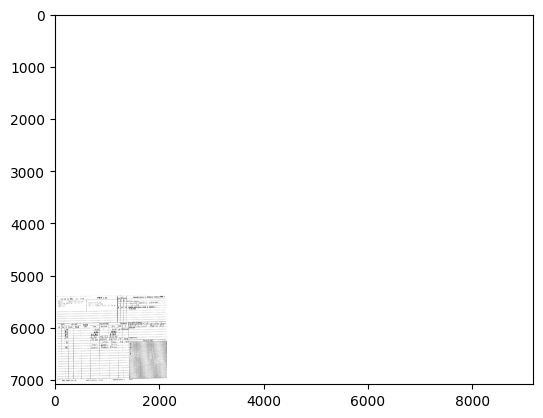

In [35]:
img[36,5283] = 
img[36,5283+1651] = 0
img[36+2114,5283+1651] = 0
img[36+2114,5283] = 0

plt.imshow(img)

print(img[1000, 6500])